# 12 Data Prep Part 1

> "Unless you try to do something beyond what you have already mastered, you will never grow.” ~ 
Ronald E. Osborn

![Mississippi river](https://i0.wp.com/www.firstinarchitecture.co.uk/wp-content/uploads/2018/04/Image-014.jpg?w=656&ssl=1)  
**Source:** Harold Norman Fisk

# Notebook Outline

1. Project Definition
2. Data Gathering
3. Summary
4. Questions

## 1. Project Definition

![solving](pictures/7.png)

As data detectives, we want to make sure we have at least a loosly define outline of what our projects involving data might look like. In particular, we want to be extra careful with those involving large amounts of data since errors can, at the very least, be very time consuming and, at worst, expensive.

For our task, we are currently sick and tired of COVID and we want to start planning our next vacation. More specifically, we would love to scratch some countries off our bucket list, but, since this can be quite costly, we want to start by figuring out more information about the options we have, given the top 2, 4, 5, etc., countries we want to visit. In essence, we want to find the best deal possible given a set of criteria that we will polish as we explore the data further.

> **Project/Goal:** To find the best place to stay at for our next vacation in terms of costs, venue, and things to do around it, given our top 3 destinations for 2021.

> **Today we will cover:** The grueling process of collecting and cleaning the data and then move on to Analysing the heck out of it.

Since hotels are expensive, we thought we would give Airbnb a try. We found this awesome website called [Inside Airbnb](http://insideairbnb.com/about.html) that has gathered a large amount of Airbnb data, and has made it publicly available for anyone to use and analyse to their heart's content. We will take advantage of this but, since we don't want to click and download every single file, one at a time, we will write some code to get us the data we need.

## 2. Data Gathering

![Gathering Data](pictures/9.png)

We will be using data scraped from a scraping tool called, [Inside Airbnb](http://insideairbnb.com/index.html). Yes, we will be scraping a bit of data from the scraper itsef. More specifically, we will be taking the skeleton (an html version of the website), downloading it, and then extracting all of the links that will help us get the data from it.

We will start by importing the following packages to help us get the data we need.

- [`os`](https://docs.python.org/3/library/os.html) --> allows to interact with, and mofify, files within our operating system.
- [`pandas`](https://pandas.pydata.org/) --> swiss army knife for data analysis in Python.
- [`numpy`](https://numpy.org/) --> core module behind the swiss army knife, and overall, excellent tool for numerical computing in Python.
- [`requests`](https://requests.readthedocs.io/en/master/) --> HTTP library for Python.
- [`bs4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) --> web scraping tool.
- [`wget`](https://pypi.org/project/wget/) --> useful tool to download data with using Python.
- [`glob`](https://docs.python.org/3.8/library/glob.html) --> excellent tool for finding and returning multiple files in your operating system using pattern matching (i.e. regex).
- [`urllib`](https://docs.python.org/3.8/library/urllib.html) --> "urllib is a powerful, user-friendly HTTP client for Python" ~ [urllib](https://docs.python.org/3.8/library/urllib.html)
- [`dask`](https://dask.org/) --> high performance computing module written in Python.

Along the way, we will create different functions to help us avoid writing the same lines of code multiple times, and we will create multiple directories for our files to keep them neatly organised.

In [ ]:
# in case you don't have the following 2 packages, make sure you run this cell
!pip install beautifulsoup4 wget

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import os
import wget
import numpy as np
import dask
from glob import glob
import urllib

# pandas by default only shows a few columns, we want them all!
pd.options.display.max_columns = None

%load_ext autoreload

Since we will be creating several directories, the first thing we will do is to assign a path to the directory where all of our data will go into and come out from.

In [2]:
path = '../data'

# uncomment this one if you are using windows instead of a mac or linux
# path = '..\data' 

We will also create a function that takes in an existing path as a starting point and many additional directory names that we might need/want to create along the way. In addition, our function will check whether the directory we are trying to create already exists, if not it will create one for each argument we pass into our function, then combine all arguments into one directory and return such directory.

You might have already seen the `*args` parameter often used inside a function in Python. What this does is that it gives us the ability to provide multiple arguments to a function without explicitely adding them to the construction of the function. It helps us save space and time while working. In addition, some of our functions will depend on this one function below.

In [3]:
def check_or_add(old_path, *args):
    
    """
    This function will help us check whether one or more directories exists, and
    if they don't exist, it will create, combine, and return a new directory.
    """
        
    if not os.path.exists(os.path.join(old_path, *args)):
        os.makedirs(os.path.join(old_path, *args))

    return os.path.join(old_path, *args)

We will use Python's `requests` library to send a request to __Inside Airbnb__, then use our path creation function to add this HTML file to a directory called, `raw_files`, and then save the HTML skeleton file as text using a context manager construct. We will call our file `insideairbnb.html`.

In [4]:
requests.get?

Signature: requests.get(url, params=None, **kwargs)
Docstring:
Sends a GET request.

:param url: URL for the new :class:`Request` object.
:param params: (optional) Dictionary, list of tuples or bytes to send
    in the query string for the :class:`Request`.
:param \*\*kwargs: Optional arguments that ``request`` takes.
:return: :class:`Response <Response>` object
:rtype: requests.Response
File:      /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/requests/api.py
Type:      function


In [5]:
path_4_source = check_or_add(path, 'raw_files')
path_4_source

'../data/raw_files'

In [6]:
web_data = requests.get('http://insideairbnb.com/get-the-data.html')

In [7]:
web_data

<Response [200]>

In [8]:
with open(os.path.join(path_4_source, 'insideairbnb.html'), 'w', encoding='utf-8') as html:
    html.write(web_data.text)

We will combine the path to our new file with the name of such file to a variable called `html_doc`. We will then read it back into the session, and parse the document using `BeautifulSoup`. We will assign our parsed file to a variable called `soup`.

In [9]:
html_doc = os.path.join(path_4_source, 'insideairbnb.html')
html_doc

'../data/raw_files/insideairbnb.html'

In [10]:
with open(html_doc, 'r', encoding='utf-8') as file: 
    soup = BeautifulSoup(file, 'html.parser')

`BeautifulSoup` will allow us to extract the links we need without much hassle. While we could figure out a way to get the exact links we need with a regular expression or a similar approach, we will extract all links at this stage by parsing the html file and taking out the links we need using pandas. For this, we will use a Python list comprehension and extract every hyperlink reference inside our parsed file.

In [11]:
list_of_links = [link.get('href') for link in soup.find_all('a')]
list_of_links[:10]

['index.html',
 'about.html',
 'behind.html',
 'get-the-data.html',
 'https://twitter.com/share',
 'about.html#disclaimers',
 'http://creativecommons.org/publicdomain/zero/1.0/',
 'amsterdam/',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/data/listings.csv.gz',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/data/calendar.csv.gz']

In [12]:
print(f"We have {len(list_of_links)} links. Wow!")

We have 21269 links. Wow!


The files we need are those that end with `listings.csv.gz` and, to extract them, (or filter out the ones we don't want), we can take advantage many string methods available in the pandas library.

We will now convert our list into a pandas Series and assign it to a variable called `our_list`. You can think of this pandas Series as a 1 dimensional array with a visible, and very flexible, index. You can select elements from a pandas Series using its index in the same way you would do it with regular lists in Python, and you can also use diverse methods such as `.head()` and `.tail()` to examine the first or last 5 elements of an array, respectively.

In [13]:
# this is a pandas Series
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [14]:
# this is another pandas Series but this one has a name
pd.Series(['hello', 'SciPy', 'Japan', '2020'], name='say_hi')

0    hello
1    SciPy
2    Japan
3     2020
Name: say_hi, dtype: object

In [15]:
# select an index
pd.Series(['hello', 'SciPy', 'Japan', '2020'], name='say_hi')[2]

'Japan'

In [16]:
toy_series = pd.Series(range(100), name='lots_of_numbers')
toy_series.head()

0    0
1    1
2    2
3    3
4    4
Name: lots_of_numbers, dtype: int64

pandas Series' have a very useful functionality inherited from NumPy that allows us to filter its elements by a specific condition. This is often referred to as masking.

In [17]:
condition1 = (toy_series > 30)
condition1

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96     True
97     True
98     True
99     True
Name: lots_of_numbers, Length: 100, dtype: bool

In [18]:
toy_series[condition1]

31    31
32    32
33    33
34    34
35    35
      ..
95    95
96    96
97    97
98    98
99    99
Name: lots_of_numbers, Length: 69, dtype: int64

We can also combine multiple operations with `&` and `|` which stand for `and` and `or`, respectively.

In [19]:
condition2 = (toy_series < 60)
condition2

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: lots_of_numbers, Length: 100, dtype: bool

In [20]:
toy_series[(condition1) & (condition2)]

31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
58    58
59    59
Name: lots_of_numbers, dtype: int64

Masks don't need to be passed in as variables but it certainly makes our code a bit cleaner and less error prone (this a completely unbiased opinion of course 😎).

In [22]:
toy_series[(toy_series > 60) | (toy_series < 30)]

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: lots_of_numbers, Length: 69, dtype: int64

Now that we now a bit more about what a pandas Series is, let's continue working with the links from Inside Airbnb.

In [23]:
list_of_links[:15]

['index.html',
 'about.html',
 'behind.html',
 'get-the-data.html',
 'https://twitter.com/share',
 'about.html#disclaimers',
 'http://creativecommons.org/publicdomain/zero/1.0/',
 'amsterdam/',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/data/listings.csv.gz',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/data/calendar.csv.gz',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/data/reviews.csv.gz',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/visualisations/listings.csv',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/visualisations/reviews.csv',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/visualisations/neighbourhoods.csv',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-10-09/visualisations/neighbourhoods.geojson']

In [24]:
our_list = pd.Series(list_of_links, name='links')
our_list.head(10) # let's examine the first five rows of our new pandas Series

0                                           index.html
1                                           about.html
2                                          behind.html
3                                    get-the-data.html
4                            https://twitter.com/share
5                               about.html#disclaimers
6    http://creativecommons.org/publicdomain/zero/1.0/
7                                           amsterdam/
8    http://data.insideairbnb.com/the-netherlands/n...
9    http://data.insideairbnb.com/the-netherlands/n...
Name: links, dtype: object

Let's check and see if we have any missing values before applying our string method to our pandas Series.

In [25]:
our_list.isna().sum()

101

In [27]:
import numpy
type(numpy.nan)

float

Since we have a few missing values in our array, we will first get rid of them using pandas `.dopna()` method. We will then grab the listings links and filter out those links we don't want with a mask that tells pandas to grab only those files that end with `listings.csv.gz`. We will also reset the index just because it is nice to have values that start from 0 and go all the way to the end of our array.

In [ ]:
our_list.dropna?

In [29]:
our_list.dropna(inplace=True) # drop NaN's and keep the changes

In [33]:
our_list.head(10)

0                                           index.html
1                                           about.html
2                                          behind.html
3                                    get-the-data.html
4                            https://twitter.com/share
5                               about.html#disclaimers
6    http://creativecommons.org/publicdomain/zero/1.0/
7                                           amsterdam/
8    http://data.insideairbnb.com/the-netherlands/n...
9    http://data.insideairbnb.com/the-netherlands/n...
Name: links, dtype: object

In [ ]:
'classroom'.

In [30]:
numpy.array([1, 2, 3, 4]) * 100

array([100, 200, 300, 400])

In [32]:
condition = our_list.str.endswith('/listings.csv.gz') # let's find the listings we need
condition.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: links, dtype: bool

In [35]:
files_we_want = our_list[condition].reset_index(drop=True) # filter out what we don't need and reset the index
files_we_want.head() # make sure everything when through as expected

0    http://data.insideairbnb.com/the-netherlands/n...
1    http://data.insideairbnb.com/the-netherlands/n...
2    http://data.insideairbnb.com/the-netherlands/n...
3    http://data.insideairbnb.com/the-netherlands/n...
4    http://data.insideairbnb.com/the-netherlands/n...
Name: links, dtype: object

Now that we have the links we need, let's go ahead and examine how many we have.

In [36]:
files_we_want.shape

(3008,)

That was a nice jump from 20k files all the way down to about 3k. That's still a lot of files to download, and will certainly be a lot of data (size-wise), so how about we have a look at how many files we have per country and, where possible, per city.

To get the countries available in our array, we will use another string method from pandas to split the urls by the `"/"`, and get the third element. If you notice in the 5 rows above, the 3rd element is the country the file belongs to. We will then use the pandas method `.unique()` to get all of the unique countries in the array.

In [39]:
'This course is about Python'.split('P')

['This course is about ', 'ython']

In [37]:
files_we_want.str.split('/')

0       [http:, , data.insideairbnb.com, the-netherlan...
1       [http:, , data.insideairbnb.com, the-netherlan...
2       [http:, , data.insideairbnb.com, the-netherlan...
3       [http:, , data.insideairbnb.com, the-netherlan...
4       [http:, , data.insideairbnb.com, the-netherlan...
                              ...                        
3003    [http:, , data.insideairbnb.com, australia, wa...
3004    [http:, , data.insideairbnb.com, australia, wa...
3005    [http:, , data.insideairbnb.com, australia, wa...
3006    [http:, , data.insideairbnb.com, australia, wa...
3007    [http:, , data.insideairbnb.com, australia, wa...
Name: links, Length: 3008, dtype: object

In [40]:
countries = files_we_want.str.split('/').str.get(3)
countries

0       the-netherlands
1       the-netherlands
2       the-netherlands
3       the-netherlands
4       the-netherlands
             ...       
3003          australia
3004          australia
3005          australia
3006          australia
3007          australia
Name: links, Length: 3008, dtype: object

Notice that countries is another array with the same length as our original `files_we_want` pandas Series.

In [41]:
unique_countries = countries.unique()
unique_countries

array(['the-netherlands', 'belgium', 'united-states', 'greece', 'spain',
       'australia', 'china', 'belize', 'italy', 'germany', 'france',
       'united-kingdom', 'argentina', 'south-africa', 'denmark',
       'ireland', 'switzerland', 'turkey', 'portugal', 'mexico', 'canada',
       'norway', 'czech-republic', 'brazil', 'chile', 'singapore',
       'sweden', 'taiwan', 'japan', 'austria'], dtype=object)

Let's now print the amount of files we have per country using a for loop. Since the variable `countries` has a pandas Sieries of the same length as the original `files_we_want` variable, we can use it as a mask to count unique countries when they are matched with the elements of our countries variable.

In [45]:
True + True

2

In [46]:
sum(countries == 'united-states')

890

In [47]:
'this is a python course'.title()

'This Is A Python Course'

In [48]:
for country in unique_countries:
    print(f"{country.title()} has ------> {len(files_we_want[countries == country])}")

The-Netherlands has ------> 59
Belgium has ------> 86
United-States has ------> 890
Greece has ------> 87
Spain has ------> 269
Australia has ------> 240
China has ------> 60
Belize has ------> 16
Italy has ------> 258
Germany has ------> 66
France has ------> 120
United-Kingdom has ------> 129
Argentina has ------> 15
South-Africa has ------> 25
Denmark has ------> 28
Ireland has ------> 47
Switzerland has ------> 88
Turkey has ------> 26
Portugal has ------> 58
Mexico has ------> 17
Canada has ------> 198
Norway has ------> 27
Czech-Republic has ------> 26
Brazil has ------> 28
Chile has ------> 6
Singapore has ------> 17
Sweden has ------> 26
Taiwan has ------> 26
Japan has ------> 17
Austria has ------> 53


## Exercise 1

- Find out how many unique cities are represented in our dataset and add them to a list. Assign this list of unique cities to a variable called `unique_cities`. **Hint:** look at how we did this above for the countries.

- Print the cities and how many files do we have for each using a for loop. 👀

Answers below! Don't peak! 👀

In [49]:
cities = files_we_want.str.split('/').str.get(5)
unique_cities = cities.unique()
unique_cities

array(['amsterdam', 'antwerp', 'asheville', 'athens', 'austin',
       'barcelona', 'barossa-valley', 'barwon-south-west-vic', 'beijing',
       'belize', 'bergamo', 'berlin', 'bologna', 'bordeaux', 'boston',
       'bristol', 'broward-county', 'brussels', 'buenos-aires',
       'cambridge', 'cape-town', 'chicago', 'clark-county-nv', 'columbus',
       'copenhagen', 'crete', 'denver', 'dublin', 'edinburgh', 'euskadi',
       'florence', 'geneva', 'ghent', 'girona', 'greater-manchester',
       'hawaii', 'hong-kong', 'data', 'istanbul', 'jersey-city', 'lisbon',
       'london', 'los-angeles', 'lyon', 'madrid', 'malaga', 'mallorca',
       'manchester', 'melbourne', 'menorca', 'mexico-city', 'milan',
       'montreal', 'munich', 'naples', 'nashville', 'new-brunswick',
       'new-orleans', 'new-york-city', 'northern-rivers', 'oakland',
       'oslo', 'ottawa', 'pacific-grove', 'paris', 'portland', 'porto',
       'prague', 'puglia', 'quebec-city', 'rhode-island',
       'rio-de-janeiro',

In [50]:
for city in unique_cities:
    print(f"{city.title()} has ------> {len(files_we_want[cities == city])}")

Amsterdam has ------> 59
Antwerp has ------> 29
Asheville has ------> 29
Athens has ------> 30
Austin has ------> 33
Barcelona has ------> 52
Barossa-Valley has ------> 28
Barwon-South-West-Vic has ------> 24
Beijing has ------> 27
Belize has ------> 16
Bergamo has ------> 26
Berlin has ------> 49
Bologna has ------> 28
Bordeaux has ------> 31
Boston has ------> 33
Bristol has ------> 27
Broward-County has ------> 17
Brussels has ------> 29
Buenos-Aires has ------> 15
Cambridge has ------> 21
Cape-Town has ------> 25
Chicago has ------> 31
Clark-County-Nv has ------> 26
Columbus has ------> 26
Copenhagen has ------> 28
Crete has ------> 18
Denver has ------> 28
Dublin has ------> 33
Edinburgh has ------> 37
Euskadi has ------> 26
Florence has ------> 31
Geneva has ------> 45
Ghent has ------> 28
Girona has ------> 25
Greater-Manchester has ------> 28
Hawaii has ------> 25
Hong-Kong has ------> 28
Data has ------> 14
Istanbul has ------> 26
Jersey-City has ------> 16
Lisbon has ------> 

### Let's now pick 2 countries and a city we'd like to visit

In [51]:
my_country = 'japan'
my_country2 = 'belgium'
my_city = 'cape-town'

The following is one of the most important functions in the whole notebook as it is the one that is going to allow us to download the data we need from Inside Airbnb.

The function takes in the following arguments:
- `urls` --> This is strictly a pandas series with the list of urls we need
- `country_city` --> This would the country or city you want to get data for
- `path_to_files` --> This is where the data will be downloaded to
- `country_city_unique` --> This is the iterable of unique countries or cities where Airbnb operates in
- `unique_num` --> If you do not need all files available for `country_city`, you can specify how many you need. Default is all files

The function operates as follows:

1. It first checks whether the country you have picked is in the list of unique countries
2. Then it creates a boolean array (aka a mask)
3. Passes it through our pandas series containing the urls to filter out the countries you don't need
4. Then it downloads the files you want and
5. Saves them into a new folder it creates called `raw_data` in the path you provided

In [52]:
def get_me_specific_data(urls, country_city, path_to_files, country_city_unique, unique_num):
    
    """
    urls: This is a pandas Series with the listings urls in it
    country_city: string with the name of the country or city you would like to get data from
    path_to_file: plain data foldet where the data will go to
    country_city_unique: interable with the unique countries or cities
    unique_num: Default None. If specified, it will download that amount of files
    """
    
    if country_city in country_city_unique: # we go over every country
        
        condition = urls.str.contains(country_city.lower()) # check whether it exists in our list of urls and create a mask
        data_we_need = urls[condition] # we pass that mask to our pandas series
        new_dir = check_or_add(path_to_files, country_city + '_data', 'raw_data') # create a new directory for the raw data
        
        if unique_num: # we first check if a unique number of files was specified
            
            num = 0
            
            while num < unique_num: # loop until we reach that point
                
                try: # we first try to download the file with wget. if wget doesn't work, we try with urllib
                    wget.download(data_we_need.iloc[num], os.path.join(new_dir, f'{country_city}_{num}.csv.gz'))
                except:
                    try: # if urllib doesn't work, we move on to the next one
                        urllib.request.urlretrieve(data_we_need.iloc[num], os.path.join(new_dir, f'{country_city}_{num}.csv.gz'))
                    except:
                        continue
                num += 1
        else:
            
            for num, data in enumerate(data_we_need): # iterate over the links we want
                
                try: # we first try to download the file with wget. if wget doesn't work, we try with urllib
                    wget.download(data, os.path.join(new_dir, f'{country_city}_{num}.csv.gz'))
                except:
                    try: 
                        urllib.request.urlretrieve(data, os.path.join(new_dir, f'{country_city}_{num}.csv.gz'))
                    except:
                        continue

Let's put our new function to use and get the first batch of data we will be using. In honor to our host, we will be picking Japan as our first country,

When doing this on your own, here is a table with the countries, the amount of files available, the total size of the uncompressed and the compressed files, and the average size per file. The recommended way to pick a country and the amount of files you should download goes as follows:
1. Pick a reasonable GB size for your project (somewhere between 2 and 4 GB should be perfect to get started on your own).
2. Pick a country.
3. If the number of files in that country don't amount to the GB size you choose in step 1, pick another country or pick multiple countries until you have the desired amount of data.
4. If you want pick multiple countries but the total size of one or more of them is too large for what you think your computer can handle, divide the total GB size you need by the GB space you have left and that would be the amount of files you should to download.
5. Use the `get_me_specific_data()` function with the appropriate parameters and wait for a bit.


| Country         | # of Cities | # of Files | GB Size Compressed  | GB Size Decompressed|
|:----------------|:------------|:-----------|:--------------------|:--------------------|
| The-Netherlands |     1       |     58     |        851 M        |        3.6 G        |
| Belgium         |     3       |     83     |        245 M        |        1.0 G        |
| United-States   |    28       |    859     |        8.4 G        |       35.0 G        |
| Greece          |     4       |     82     |        902 M        |        3.8 G        |
| Spain           |     9       |    259     |        2.7 G        |       12.0 G        |
| Australia       |     7       |    233     |        2.6 G        |       11.0 G        |
| China           |     3       |     57     |        1.1 G        |        4.9 G        |
| Belize          |     1       |     15     |         38 M        |        180 M        |
| Italy           |    10       |    246     |        4.0 G        |       16.0 G        |
| Germany         |     2       |     63     |        894 M        |        3.6 G        |
| France          |     3       |    117     |        3.1 G        |       13.0 G        |
| United-Kingdom  |     5       |    125     |        2.7 G        |       11.0 G        |
| Argentina       |     1       |     14     |        272 M        |        1.1 G        |
| South-Africa    |     1       |     24     |        452 M        |        1.9 G        |
| Denmark         |     1       |     27     |        505 M        |        2.2 G        |
| Ireland         |     2       |     45     |        550 M        |        2.3 G        |
| Switzerland     |     2       |     86     |        200 M        |        858 M        |
| Turkey          |     1       |     25     |        275 M        |        1.2 G        |
| Portugal        |     2       |     56     |        879 M        |        3.7 G        |
| Mexico          |     1       |     16     |        279 M        |        1.1 G        |
| Canada          |     7       |    191     |        1.4 G        |        6.0 G        |
| Norway          |     1       |     26     |        156 M        |        663 M        |
| Czech-Republic  |     1       |     25     |        317 M        |        1.3 G        |
| Brazil          |     1       |     27     |        731 M        |        2.9 G        |
| Chile           |     1       |      5     |         52 M        |        232 M        |
| Singapore       |     1       |     16     |        102 M        |        516 M        |
| Sweden          |     1       |     25     |        129 M        |        561 M        |
| Taiwan          |     1       |     25     |        281 M        |        1.1 G        |
| Japan           |     1       |     16     |        248 M        |        1.2 G        |
| Austria         |     1       |     52     |        433 M        |        1.8 G        |

Let's now put our function to use and get the data we need for our project.

In [53]:
%%time

get_me_specific_data(files_we_want, my_country, path, unique_countries, 4)
get_me_specific_data(files_we_want, my_country2, path, unique_countries, 4)
get_me_specific_data(files_we_want, my_city, path, unique_cities, 4)

CPU times: user 1.4 s, sys: 913 ms, total: 2.31 s
Wall time: 48.8 s


We can check the data we have gathered so far to see if we got back what we wanted from Inside Airbnb.

In [54]:
country1_raw_files = check_or_add(path, my_country + '_data', 'raw_data') # let's add our new raw_data path to a variable
country2_raw_files = check_or_add(path, my_country2 + '_data', 'raw_data')
city_raw_files = check_or_add(path, my_city + '_data', 'raw_data')

The function `os.listdir()` helps us see the files inside a directory/folder.

In [55]:
print(f"Amount of files we downloaded for {my_country} --> {len(os.listdir(country1_raw_files))}")
print(f"Amount of files we downloaded for {my_country2} --> {len(os.listdir(country2_raw_files))}")
print(f"Amount of files we downloaded for {my_city} --> {len(os.listdir(city_raw_files))}")

Amount of files we downloaded for japan --> 4
Amount of files we downloaded for belgium --> 4
Amount of files we downloaded for cape-town --> 4


Perfect, it seems like we got all of the files we wanted so let's look under the hood and examine one to see what we've got.

Since pandas has a `compression` parameter, we will not worry about decompressing our files with other tools and use a pandas DataFrame in the next few cells. You can think of a pandas DataFrame as many pandas Series combined into one data structure, or as a spreadsheet with rows and columns. You can also pass in Python dictionaries, two-dimensional lists and arrays, tuples, etc. For example:

In [56]:
toy_df = pd.DataFrame({'column_A': range(5),
                       'column_B': range(5, 10),
                       'column_C': range(15, 20)})
toy_df

,column_A,column_B,column_C
0,0,5,15
1,1,6,16
2,2,7,17
3,3,8,18
4,4,9,19


You can access a pandas column using the same convention used when accessing specific keys from a dictionary. The result will be a pandas Series.

In [57]:
toy_df['column_A']

0    0
1    1
2    2
3    3
4    4
Name: column_A, dtype: int64

All operations (or almost all) that can be done in a pandas Series can be done in a pandas DataFrame.

In [58]:
toy_df[toy_df['column_A'] > 2]

,column_A,column_B,column_C
3,3,8,18
4,4,9,19


In [59]:
toy_df.mean() # provides us with the mean of all three columns and moves the column names to the index

column_A     2.0
column_B     7.0
column_C    17.0
dtype: float64

Now that we know a bit more about pandas DataFrames, let's continue and examine one of the many datasets we just downloaded.

In [60]:
file_num = 1 # pick a number for the file you want to show.

In [61]:
my_country

'japan'

In [62]:
df = pd.read_csv(os.path.join(country1_raw_files, f'{my_country}_{file_num}.csv.gz'), compression='gzip', 
                 low_memory=False, encoding='utf-8')

df.info(memory_usage='deep') # this will tells us exactly how much space this dataset is occupying in our computer's memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14715 entries, 0 to 14714
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 157.7 MB


Notice how the previous random file has about 15k rows, 106 columns, and it has a decompressed size of ~160MB. Let's have a quick glance at the first few rows of the file with the `.head()` method.

In [63]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35303,https://www.airbnb.com/rooms/35303,20200625032351,2020-06-25,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,Current tenants are living in this flat over 2...,"5min to subway, 10min to JR stations, you can ...","Your private room, Kitchen, Bathroom, Toilet, ...",I provide common space cleaning twice a week. ...,"If you would like to stay monthly, there is a ...",NaN,NaN,https://a0.muscache.com/im/pictures/67365319/c...,NaN,151977,https://www.airbnb.com/users/show/151977,Miyuki,2010-06-25,"Shibuya, Tokyo, Japan",Hi I am Miyuki Kanda. I run a real estate & pr...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/151977/profil...,https://a0.muscache.com/im/users/151977/profil...,Shibuya District,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Shibuya, Tokyo, Japan",Shibuya District,Shibuya Ku,NaN,Shibuya,Tokyo,150-0001,Tokyo,"Shibuya, Japan",JP,Japan,35.67152,139.71203,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",NaN,"$4,163.00",NaN,"$110,000.00","$30,000.00","$5,000.00",1,$0.00,28,1125,28,28,1125,1125,28.0,1125.0,20 months ago,t,29,59,89,89,2020-06-25,18,0,2011-12-28,2018-07-28,94.0,9.0,9.0,9.0,10.0,10.0,9.0,t,Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.17
1,197677,https://www.airbnb.com/rooms/197677,20200625032351,2020-06-25,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,NaN,NaN,NaN,NaN,1. Smoking is NOT allowed inside the property....,NaN,NaN,https://a0.muscache.com/im/pictures/38437056/d...,NaN,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,Tokyo,Would love to travel all over the world and me...,within a few hours,100%,85%,t,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Sumida, Tokyo, Japan",Sumida District,Sumida Ku,NaN,Sumida,Tokyo

We have a ton of variables available so things will get very fun in the next part when we get to data cleaning.

Let's have a quick look at how many files we downloaded in total. To do this we will use the glob module, which is part of the starndard library of Python. Glob allows us use pattern matching to find files in one or many nested directories in our computer. For example, in the file path `my_data/*.csv`, the wildcard `*` will help us select all files, regardless of their names, that end up with `.csv`. In contrast, the `os.path.join()` below helps us connect different directories together regardless of the operating system.

In [64]:
files = glob(os.path.join(path, '*_data', 'raw_data', '*.csv.gz'))
len(files), files[-5:]

(12,
 ['../data/cape-town_data/raw_data/cape-town_2.csv.gz',
  '../data/belgium_data/raw_data/belgium_2.csv.gz',
  '../data/belgium_data/raw_data/belgium_0.csv.gz',
  '../data/belgium_data/raw_data/belgium_3.csv.gz',
  '../data/belgium_data/raw_data/belgium_1.csv.gz'])

Now that we have a list of all of our files, we will create a function to help us decompress the files and save them as comma separated value fules (i.e. `CSV`).

In [65]:
def get_csv_files(data, path_out, new_dir, country_city, nums):
    """
    data: the compressed file
    path_out: the directory all of our data for this project
    new_dir: new directory for the uncompressed files
    country_city: name of the country
    nums: number of files available
    """
    
    df = pd.read_csv(data, compression='gzip',  low_memory=False, encoding='utf-8')
    
    df.to_csv(os.path.join(check_or_add(path_out, country_city + '_data', new_dir), 
                                        f'{country_city}_{nums}.csv'), index=False, encoding='utf-8')
    
    print(f"Done Reading and Saving file {nums}!")

It is time to introduce Dask to the session. In essence:

> "Dask provides advanced parallelism for analytics, enabling performance at scale for the tools you love" ~ [dask.org](https://dask.org/)

One of the best features of Dask is that it allows you to scale regular Python code for data analysis to either fully use all of the resources in your machine or to scale your computations to a cluster of machines. Dask does this by integrating itself with some of the most well known tools in the data analytics domain such as pandas, NumPy, SciKit-Learn, its own dask bags which are great for processing large unstructured files, and many more. In addition, it allows you to create your own parallelised workflow with a useful function called `delayed()` that lazily starts building up a paralellised computational graph.

The `delayed` object is the dask functionality we will be taking advantage of to process all of our compressed files in parallel. 

Let's go over a quick example inspired from one in Dask's own tutorials. Here, we will create a sleepy pemdas function. You might remember this order of operations from your high school days, where your math teacher would tell you that parentheses always come firt, followed by the exponents, then the multiplication, the division, the addition and the subtraction when doing operations. We will follow this pemdas order of operations with the pandas Series of a toy dataframe.

In [66]:
os.cpu_count()

8

In [68]:
np.sum([4, 4, 4, 4, 4, 4, 12, 8, 4, 4, 8])

60

In [69]:
# first let's import the delayed function from dask
from dask import delayed
from time import sleep

In [70]:
# let's create a toy dataframe for our computation
toy_df = pd.DataFrame({"A": [1, 2, 3, 4],
                       "B": [5, 6, 7, 8],
                       "C": [9, 10, 11, 12]})
toy_df

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


Here we have our functions. We are skipping the parentheses as we will test them all in different calls.

In [71]:
def exponents(a):
    sleep(1)
    return a ** 2

def mult(b, c, d):
    sleep(1)
    return b * c * d

def divide(d, e, f):
    sleep(1)
    return (d / e) / f

def addition(f, g, h):
    sleep(1)
    return f + g + h

def subtraction(h, i, j):
    sleep(1)
    return h - i - j

We will first run these functions without using dask delayed and time it.

In [72]:
toy_df['A']

0    1
1    2
2    3
3    4
Name: A, dtype: int64

In [73]:
%%time

ex = exponents(toy_df['A'])
ex1 = exponents(toy_df['B'])
ex2 = exponents(toy_df['C'])


mu = mult(ex, ex1, ex2)

di = divide(ex, ex1, ex2)

ad = addition(ex, ex1, ex2)

result = subtraction(mu, di, ad)
result

CPU times: user 4.32 ms, sys: 1.69 ms, total: 6.01 ms
Wall time: 7.03 s


0      1917.999506
1     14259.998889
2     53181.998482
3    147231.998264
dtype: float64

As you can see, this operation takes about 7 seconds because each needs to sleep for one before advancing. Now, let compute and visualise the computation graph we are creating with dask.

In [74]:
%%time

ex = delayed(exponents)(toy_df['A'])
ex1 = delayed(exponents)(toy_df['B'])
ex2 = delayed(exponents)(toy_df['C'])

mu = delayed(mult)(ex, ex1, ex2)
di = delayed(divide)(ex, ex1, ex2)
ad = delayed(addition)(ex, ex1, ex2)
result = delayed(subtraction)(mu, di, ad)

CPU times: user 1.97 ms, sys: 2.19 ms, total: 4.16 ms
Wall time: 3.05 ms


In [75]:
result

Delayed('subtraction-27f7b9f9-a479-4089-8782-aa2f2c70b23f')

In [76]:
%%time

result.compute()

CPU times: user 13.1 ms, sys: 18.4 ms, total: 31.5 ms
Wall time: 3.05 s


0      1917.999506
1     14259.998889
2     53181.998482
3    147231.998264
dtype: float64

To evaluate what just happened, dask will create a directed acyclic graph for us that shows us the order in which the computations took place. In order to use this functionality, we need to have installed the `python-graphviz` module and the actual [graphviz](https://www.graphviz.org/) tool.

First download the first command or go to graphviz website and use the appropriate download option for your operating system. Then procede to the second command.

```sh

# first command
conda install -c conda-forge graphviz -y

# second command
pip install graphviz
```

In [ ]:
!pip install graphviz

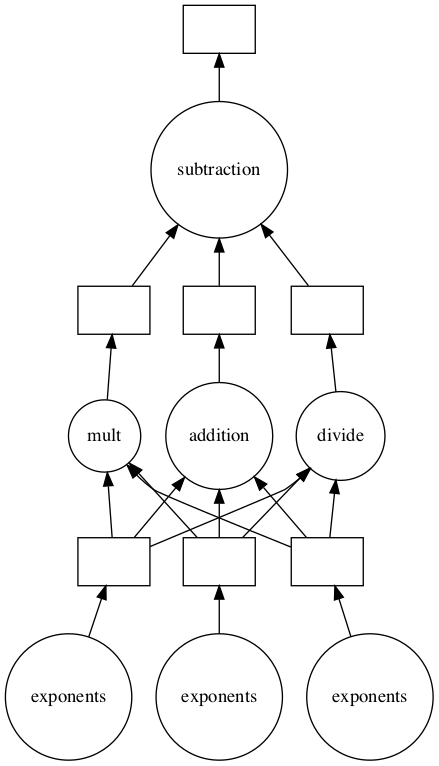

In [77]:
result.visualize()

## Exercise 2

1. Create a pandas dataframe with fake data.
2. Create 2 functions that perform a computation on a different pandas Series of your dataframe each. Make your functions so that they sleep for 1 second.
3. Create 1 function that takes the outputof the previous two and return either an array or a single number. Make your functions so that they sleep for 1 second.
4. Evaluate the implementation of your functions **without** dask.delayed. Time it with `%%time` at the top of your cell.
5. Evaluate the implementation of your functions **using** dask.delayed. Time it with `%%time` at the top of your cell.
6. Compare both functions.

In [ ]:
# your 3 functions go here



In [ ]:
%%time
# First implementation goes here


In [ ]:
# delay your functions here



In [ ]:
%%time
# test your delayed functions here


Now let's apply our `get_csv_files()` function using dask delayed to process the decompression of the files in a much faster manner.

In [78]:
%%time

results = []

for num, file in enumerate(files):
    
    if my_country in file:
        result = dask.delayed(get_csv_files)(data=file, path_out=path, new_dir='csv_files', country_city=my_country, nums=num)
        results.append(result)
        
    elif my_country2 in file:
        result = dask.delayed(get_csv_files)(data=file, path_out=path, new_dir='csv_files', country_city=my_country2, nums=num)
        results.append(result)
        
    elif my_city in file:
        result = dask.delayed(get_csv_files)(data=file, path_out=path, new_dir='csv_files', country_city=my_city, nums=num)
        results.append(result)

CPU times: user 12.2 ms, sys: 8.71 ms, total: 20.9 ms
Wall time: 22.3 ms


In [79]:
results[:5]

[Delayed('get_csv_files-bc15f281-0f0b-4d7f-a401-476a378e5616'),
 Delayed('get_csv_files-469532a1-9999-4822-8998-6ece3a64170b'),
 Delayed('get_csv_files-68db064f-32c6-4680-ac53-0570df1adb68'),
 Delayed('get_csv_files-a267dac2-7359-487f-ac93-08780c041b95'),
 Delayed('get_csv_files-448d1a35-065f-4892-8457-b313b154259f')]

Notice the delayed objects above. Since they have all been accumulated inside a list, we will use a list comprehentions to loop over them while computing the calculations.

In [80]:
%%time

results_done = [result.compute() for result in results]

Done Reading and Saving file 0!
Done Reading and Saving file 1!
Done Reading and Saving file 2!
Done Reading and Saving file 3!
Done Reading and Saving file 4!
Done Reading and Saving file 5!
Done Reading and Saving file 6!
Done Reading and Saving file 7!
Done Reading and Saving file 8!
Done Reading and Saving file 9!
Done Reading and Saving file 10!
Done Reading and Saving file 11!
CPU times: user 31.2 s, sys: 3.11 s, total: 34.3 s
Wall time: 36.4 s


Double check that you have the correct amount of decompressed files with the cell below.

In [81]:
csv_files = glob(os.path.join(path, '*_data', 'csv_files', '*.csv'))
len(csv_files)

12

# Awesome Work! Now to Clean and Reshape our Data!

![Cleaning](https://media.giphy.com/media/RjpE964WUAE5a/giphy.gif)

## 3. Summary

In this notebook we learned:

1. How to think about the data analytics cycle.
2. How to form a project/idea/task.
3. To find the data we need and work around the inconsistencies that might arise in the process.
4. How to make directories/folders work with us.
5. How to manipulate 1-dimensional arrays using pandas Series, and 2-dimensional data structures using pandas dataframe.
6. To delay, and lazily compute operations using dask.